In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydst

Dst = pydst.Dst(lang='en')

In [204]:
projdata = Dst.get_data(table_id = 'FRDK218', variables={'HERKOMST':['*'],'BEVÆGELSE':['*'], 'TID':['*']})

In [205]:
#projdata.set_index('TID',inplace=True)
#projdata.drop('TID',axis=1, inplace=True)
proj_data=projdata.groupby(['BEVÆGELSE','TID'])['INDHOLD'].sum()
proj_data=proj_data.unstack(level=0)
proj_data.reset_index(inplace=True)
proj_data.drop(labels='Population increase', axis=1,inplace=True)
proj_data.drop(labels='Population primo', axis=1,inplace=True)

In [206]:
proj_data['Birth surplus']=proj_data['Livebirths']-proj_data['Deaths']
proj_data['Immigration surplus']=proj_data['Immigrated']-proj_data['Emigrated']
proj_data['Population growth']=proj_data['Birth surplus']+proj_data['Immigration surplus']

In [208]:
aar=[2020]
next_aar=aar[-1]
while next_aar<2060:
    next_aar=aar[-1]+5
    aar.append(next_aar)

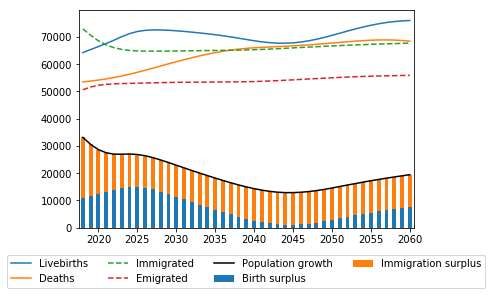

In [210]:
proj_data[['Birth surplus','Immigration surplus']].plot(kind='bar', stacked=True)
proj_data['Livebirths'].plot()
proj_data['Deaths'].plot()
proj_data['Immigrated'].plot(linestyle='dashed')
proj_data['Emigrated'].plot(linestyle='dashed')
proj_data['Population growth'].plot(color='k')
plt.xticks(np.arange(2,len(proj_data),5),aar)
plt.legend(bbox_to_anchor=(0.5, -0.3), loc=8, ncol=4)
plt.show()

Alderspyramide

In [217]:
agedist = Dst.get_data(table_id = 'FRDK118', variables={'HERKOMST':['*'],'KØN':['*'], 'ALDER':['*'], 'TID':['*']})

In [228]:
agedist
age_dist=agedist.groupby(['KØN','ALDER','TID'])['INDHOLD'].sum()
age_dist=age_dist.unstack(level=0)
age_dist.reset_index(inplace=True)

In [229]:
age_dist

KØN,ALDER,TID,Men,Women
0,0 years,2018,31624.0,30107.0
1,0 years,2019,33094.0,31435.0
2,0 years,2020,33667.0,31978.0
3,0 years,2021,34222.0,32507.0
4,0 years,2022,34795.0,33053.0
5,0 years,2023,35420.0,33646.0
6,0 years,2024,36079.0,34272.0
7,0 years,2025,36661.0,34824.0
8,0 years,2026,37059.0,35201.0
9,0 years,2027,37273.0,35405.0
